In [1]:
import numpy as np
import scipy as sp
import librosa
import soundfile as sf
import matplotlib.pyplot as plt  
import pywt
import sounddevice as sd

In [2]:
n = np.linspace(0, 1000, 1000)

d0 = np.sin(0.7217*n) + np.sin(1.0247*n)

d1 = np.sin(0.5346*n) + np.sin(0.9273*n)

d2 = np.sin(0.5346*n) + np.sin(1.0247*n)

d3 = np.sin(0.5346*n) + np.sin(1.1328*n)

d4 = np.sin(0.5906*n) + np.sin(0.9273*n)

d5 = np.sin(0.5906*n) + np.sin(1.0247*n)

d6 = np.sin(0.5906*n) + np.sin(1.1328*n)

d7 = np.sin(0.6535*n) + np.sin(0.9273*n)

d8 = np.sin(0.6535*n) + np.sin(1.0247*n)

d9 = np.sin(0.6535*n) + np.sin(1.1328*n)

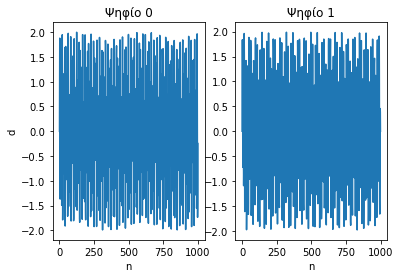

In [32]:
plt.subplot(1,2,1)
plt.plot(d0)
plt.xlabel('n')
plt.ylabel('d')
plt.title('Ψηφίο 0')
plt.subplot(1,2,2)
plt.plot(d1)
plt.xlabel('n')
plt.title('Ψηφίο 1')
plt.savefig('p1a.jpg')

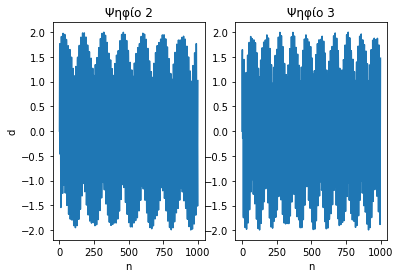

In [33]:
plt.subplot(1,2,1)
plt.plot(d2)
plt.xlabel('n')
plt.ylabel('d')
plt.title('Ψηφίο 2')
plt.subplot(1,2,2)
plt.plot(d3)
plt.xlabel('n')
plt.title('Ψηφίο 3')
plt.savefig('p1b.jpg')

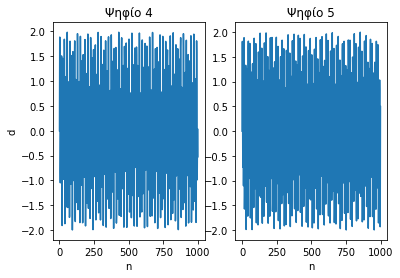

In [34]:
plt.subplot(1,2,1)
plt.plot(d4)
plt.xlabel('n')
plt.ylabel('d')
plt.title('Ψηφίο 4')
plt.subplot(1,2,2)
plt.plot(d5)
plt.xlabel('n')
plt.title('Ψηφίο 5')
plt.savefig('p1c.jpg')

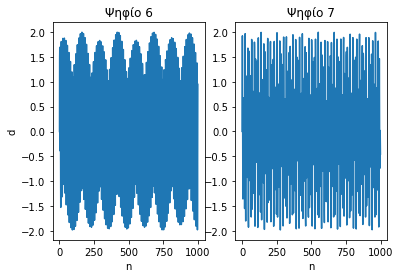

In [35]:
plt.subplot(1,2,1)
plt.plot(d6)
plt.xlabel('n')
plt.ylabel('d')
plt.title('Ψηφίο 6')
plt.subplot(1,2,2)
plt.plot(d7)
plt.xlabel('n')
plt.title('Ψηφίο 7')
plt.savefig('p1d.jpg')

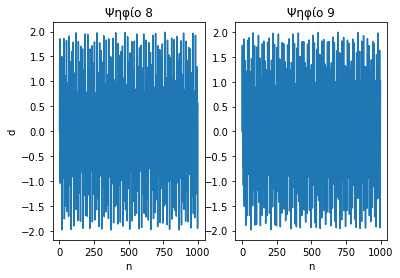

In [36]:
plt.subplot(1,2,1)
plt.plot(d8)
plt.xlabel('n')
plt.ylabel('d')
plt.title('Ψηφίο 8')
plt.subplot(1,2,2)
plt.plot(d9)
plt.xlabel('n')
plt.title('Ψηφίο 9')
plt.savefig('p1e.jpg')

In [37]:
f = np.linspace(-np.pi, np.pi, 1000)

D0 = np.fft.fft(d0)

D1 = np.fft.fft(d1)

D2 = np.fft.fft(d2)

D3 = np.fft.fft(d3)

D4 = np.fft.fft(d4)

D5 = np.fft.fft(d5)

D6 = np.fft.fft(d6)

D7 = np.fft.fft(d7)

D8 = np.fft.fft(d8)

D9 = np.fft.fft(d9)



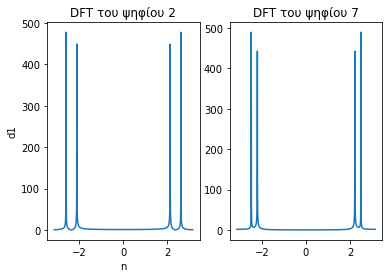

In [39]:
plt.subplot(1,2,1)
plt.plot(f,np.abs(D2))
plt.xlabel('n')
plt.ylabel('d1')
plt.title('DFT του ψηφίου 2')
plt.subplot(1,2,2)
plt.plot(f,np.abs(D7))
plt.title('DFT του ψηφίου 7')
plt.savefig('p1f.jpg')

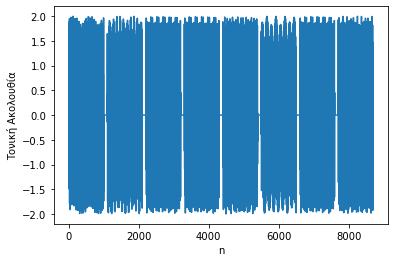

In [48]:
zeros = np.zeros(100)
tone_sequence = np.concatenate([d0,zeros,d3,zeros,d1,zeros,d1,zeros,d4,zeros,d6,zeros,d1,zeros,d7])
sf.write("tone_sequence.wav", tone_sequence, 8192)
plt.plot(tone_sequence)
plt.xlabel('n')
plt.ylabel('Τονική Ακολουθία')
plt.savefig('p1g.jpg')

In [59]:
sqr_w = np.ones(1000)
Fs0 = np.fft.fft(sqr_w*d0)
Fs1 = np.fft.fft(sqr_w*d1)
Fs3 = np.fft.fft(sqr_w*d3)
Fs4 = np.fft.fft(sqr_w*d4)
Fs6 = np.fft.fft(sqr_w*d6)
Fs7 = np.fft.fft(sqr_w*d7)

In [60]:
ham_w = np.hamming(1000)
Fh0 = np.fft.fft(ham_w*d0)
Fh1 = np.fft.fft(ham_w*d1)
Fh3 = np.fft.fft(ham_w*d3)
Fh4 = np.fft.fft(ham_w*d4)
Fh6 = np.fft.fft(ham_w*d6)
Fh7 = np.fft.fft(ham_w*d7)

In [69]:
D = [D0,D1,D2,D3,D4,D5,D6,D7,D8,D9]
k = np.zeros((10,2))

for i in np.arange(0,10):
    
    max1 = 0
    max2 = 0 
    
    En = np.abs(D[i]) * np.abs(D[i])
    for j in np.arange(0,500):
        if En[j] > En[max1]:
            max1 = j
            
        elif En[j] > En[max2]:
            max2 = j
            
    k[i][0] = max1
    k[i][1] = max2

print("Λίστα k:"); print(k); print()
print("Λίστα συχνοτήτων:"); print(2 * np.pi * k/1000)


Λίστα k:
[[115. 163.]
 [ 85. 148.]
 [ 85. 163.]
 [ 85. 180.]
 [ 94. 148.]
 [ 94. 163.]
 [ 94. 180.]
 [104. 148.]
 [104. 163.]
 [104. 180.]]

Λίστα συχνοτήτων:
[[0.72256631 1.02415921]
 [0.53407075 0.92991143]
 [0.53407075 1.02415921]
 [0.53407075 1.13097336]
 [0.59061942 0.92991143]
 [0.59061942 1.02415921]
 [0.59061942 1.13097336]
 [0.65345127 0.92991143]
 [0.65345127 1.02415921]
 [0.65345127 1.13097336]]


In [76]:
def ttdecode(signal):
    size = np.size(signal)
    result = []
    i = j = 0
    
    h = np.zeros(1000)
    
    while i < size:
        while signal[i] == 0:
            i +=1
        j = 0
        
        for j in np.arange(0,1000):
            if i < size:
                h[j] = signal[i]
                i += 1
                j += 1
                
        E  = np.abs(np.fft.fft(h)) * np.abs(np.fft.fft(h))
        max1 = max2 = 0
        
        for s in np.arange(0,500):
            if E[s] > E[max1]:
                max1 = s
                
            elif E[s] > E[max2]:
                max2 = s
                
        for n in np.arange(0,10):
            if ((max1 > k[n][0]-4) and (max1 < k[n][0]+4))and((max2 > k[n][1]-4) and (max2 < k[n][1]+4)):
                result.append(n)
            elif ((max2 > k[n][0]-4) and (max2 < k[n][0]+4))and((max1 > k[n][1]-4) and (max1 <= k[n][1]+4)):
                result.append(n)
                
    return result
            
print(ttdecode(tone_sequence))  

[0, 3, 1, 1, 4, 6, 1, 7]


In [73]:
easySig = np.load("easySig.npy")
hardSig = np.load("hardSig.npy")

print('easySig:',ttdecode(easySig))
print('hardSig:',ttdecode(hardSig))

easySig: [8, 1, 0, 3, 9, 6, 3, 8]
hardSig: [4, 8, 1, 9, 2, 1, 5, 3, 6, 3]
